### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My GitHub repository.

# 

# Assignment activity 2

### Prepare your workstation

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [8]:
# Determine whether there are missing values.
ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

There are no missing values in the ad dataframe 

In [9]:
# Determine the metadata of the data set.
print(ad.dtypes)

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


The datatypes within the dataframe consists of object and integer

In [10]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [11]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')


# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [12]:
# Determine whether there are missing values.
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [13]:
# Determine the metadata of the data set.
print(ar.dtypes)

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [14]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [15]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [16]:
# Determine whether there are missing values.
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

The nc dataframe does not contain any missing values

In [17]:
# Determine the metadata of the data set.
print(nc.dtypes)


appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [ ]:
# Determine the descriptive statistics of the data set.
nc.describe()

### Explore the data set

**Question 1:** How many locations are there in the data set?

In [29]:
# Determine the number of locations.
nc['sub_icb_location_name'].value_counts()
print(len(nc['sub_icb_location_name'].value_counts()))

106


Data within the nc dataframe has been collected from 106 different locations

**Question 2:** What are the five locations with the highest number of records?



In [24]:
# Determine the top five locations based on record count.
print ("Top 5 locations with highest number of records:")
#name variable and use value counts to calculate frequency 
n = 5
nc['sub_icb_location_name'].value_counts()[:n]

Top 5 locations with highest number of records:


NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

W2U3Z, 91Q, 15N, D9Y0V, A3A8R are the locations with the highest records

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [20]:
# Determine the number of service settings using value counts()
nc['service_setting'].value_counts()
print ("number of service settings:")
# use len function to idenitfy number of service settings
print(len(nc['service_setting'].value_counts()))

number of service settings:
5


In [163]:
# Determine the number of context types.
nc['context_type'].value_counts()
print ("number of context types:")
print(len(nc['context_type'].value_counts()))

number of context types:
3


In [22]:
# Determine the number of national categories.
nc['national_category'].value_counts()
print ("number of national categories:")
print(len(nc['national_category'].value_counts()))

number of national categories:
18


In [23]:
# Determine the number of appointment status.
ar['appointment_status'].value_counts()
print ("number of appointment status:")
# use len function to idenitfy number of appointment status
print(len(ar['appointment_status'].value_counts()))

number of appointment status:
3


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [30]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
print(ad[['appointment_date']].head(5))

  appointment_date
0        01-Dec-21
1        01-Dec-21
2        01-Dec-21
3        01-Dec-21
4        01-Dec-21


In [31]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
print(nc[['appointment_date']].head(5))

  appointment_date
0       2021-08-02
1       2021-08-02
2       2021-08-02
3       2021-08-02
4       2021-08-02


In [32]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,11-15 Minutes,1439


In [33]:
# Change the date format of nc['appointment_date'] 
#easier for analysis
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
nc


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [34]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print("appointments were made between:")
print (ad.appointment_date.min())
print (ad.appointment_date.max())

appointments were made between:
2021-12-01 00:00:00
2022-06-30 00:00:00


In [35]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print("appointments were made between:")
print (nc.appointment_date.min())
print (nc.appointment_date.max())

appointments were made between:
2021-08-01 00:00:00
2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [36]:
# For each of these service settings, determine the number of records available for the period and the location. 
# create a new df
nc_subset = nc.copy()
#specify location using ==
nc_subset = nc_subset[nc_subset['sub_icb_location_name']=='NHS North West London ICB - W2U3Z']
#specify date time period 
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-06-01')
nc_subset = nc_subset[(nc_subset['appointment_date']>=start_date) & (nc_subset['appointment_date']<=end_date)]
#use mode as aggregtion method to find most popular service setting
num_service_settings = nc_subset['service_setting'].mode()


# View the output.
print("The most popular service setting in North West London from 2022-01-01 to 2022-06-01 is:")
print(nc_subset['service_setting'].value_counts().nlargest(1).index[0])

The most popular service setting in North West London from 2022-01-01 to 2022-06-01 is:
General Practice


**Question 3:** Which month had the highest number of appointments?

In [166]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
nc_subset.groupby(nc_subset.appointment_date.dt.month)[['count_of_appointments']] \
.sum() \
.sort_values('count_of_appointments', ascending=False)


,count_of_appointments
appointment_date,
3,1232596
5,1163863
2,1053468
1,1050517
4,1006387
6,49410


March 2022 = highest count of appointments 
June 2022 = lowest count of appointments

**Question 4:** What was the total number of records per month?

In [169]:
# Total number of records per month.
#nc_subset.groupby(nc_subset.appointment_date.dt.month)['count_of_appointments'].sum()
nc_subset['Month'] = nc_subset['appointment_date'].dt.month
records_per_month = nc_subset.groupby('Month').size()


print("Total number of records per month:")
print(records_per_month)

Total number of records per month:
Month
1    1183
2    1113
3    1271
4    1121
5    1201
6      47
dtype: int64


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [58]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [42]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month']=nc['appointment_month'].astype(str)
print(nc)

       appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
...                              

In [56]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.copy()
nc_ss = nc_ss.groupby('appointment_month')['count_of_appointments'].sum().reset_index(name='total_count')


# View output.
print(nc_ss)

   appointment_month  total_count
0            2021-08     23852171
1            2021-09     28522501
2            2021-10     30303834
3            2021-11     30405070
4            2021-12     25140776
5            2022-01     25635474
6            2022-02     25355260
7            2022-03     29595038
8            2022-04     23913060
9            2022-05     27495508
10           2022-06     25828078


**Service settings:**

In [203]:
#nc_servs_total = nc_servs.groupby('appointment_month')['count'].sum().reset_index(name='total_count')
nc_servs = nc.groupby(['appointment_month', 'service_setting']).size().reset_index(name='count')
nc_servs

,appointment_month,service_setting,count
0,2021-08,Extended Access Provision,9023
1,2021-08,General Practice,31381
2,2021-08,Other,12294
3,2021-08,Primary Care Network,14773
4,2021-08,Unmapped,2528
5,2021-09,Extended Access Provision,9707
6,2021-09,General Practice,33477
7,2021-09,Other,13098
8,2021-09,Primary Care Network,15964
9,2021-09,Unmapped,2676


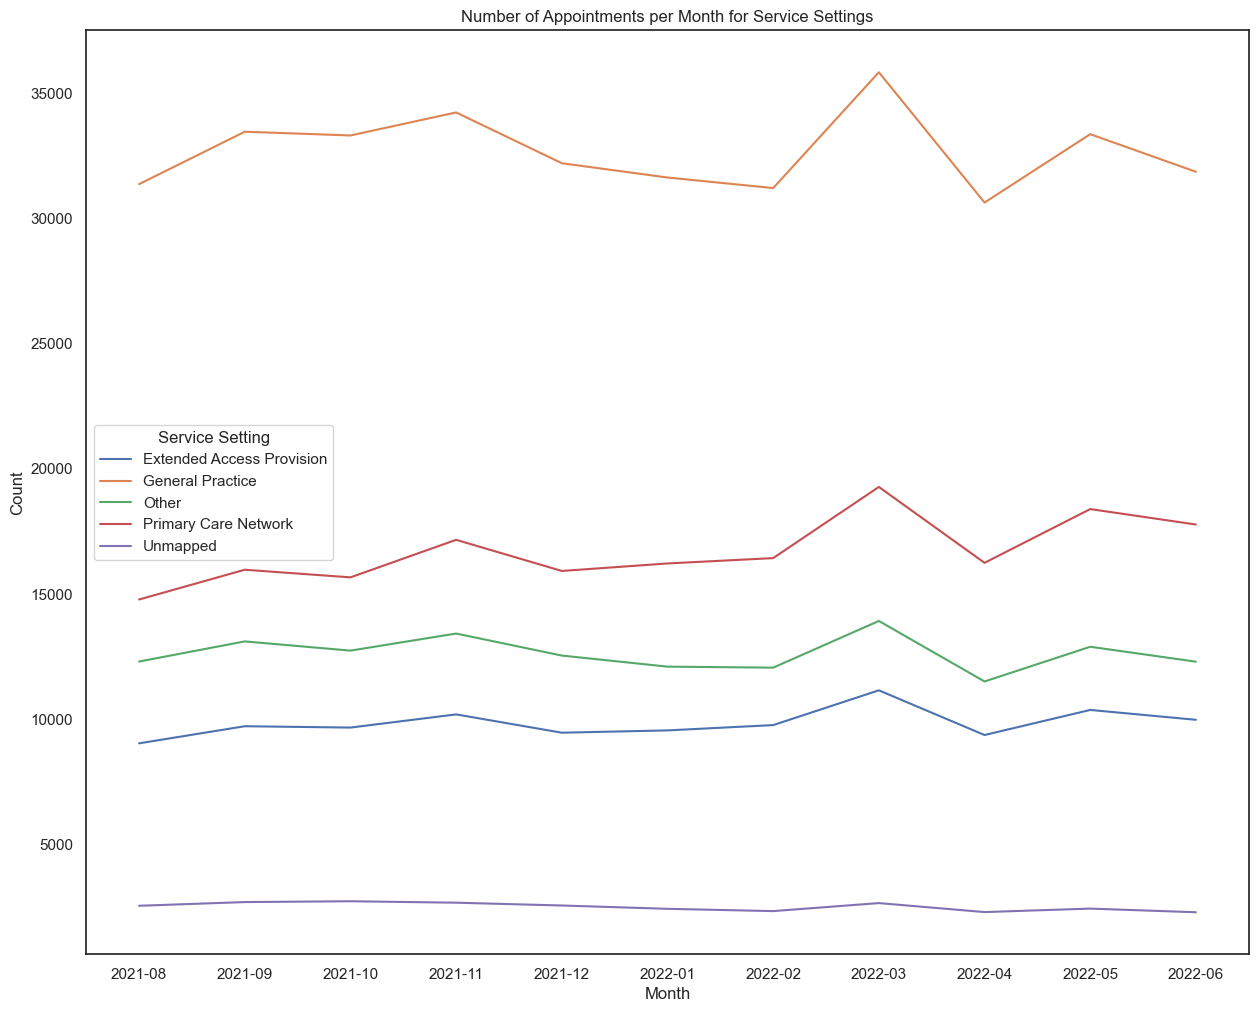

In [204]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count', hue='service_setting', data=nc_servs)
#name graph
plt.title('Number of Appointments per Month for Service Settings')
#label axis
plt.xlabel('Month')
plt.ylabel('Count')
#label legend
plt.legend(title='Service Setting')
plt.show()

general practice = most used service setting
large gap between general practice and primary care network service setting
unmapped = lowest service settings 


all service settings peaked in March 2022

**Context types:**

In [71]:
# Create a separate data set that can be used in future weeks using group by functions
nc_ct = nc.groupby(['appointment_month', 'context_type']).size().reset_index(name='count')
nc_ct_total = nc_ct.groupby('appointment_month')['count'].sum().reset_index(name='total_count')

# View output.
nc_ct_total 


,appointment_month,total_count
0,2021-08,69999
1,2021-09,74922
2,2021-10,74078
3,2021-11,77652
4,2021-12,72651
5,2022-01,71896
6,2022-02,71769
7,2022-03,82822
8,2022-04,70012
9,2022-05,77425


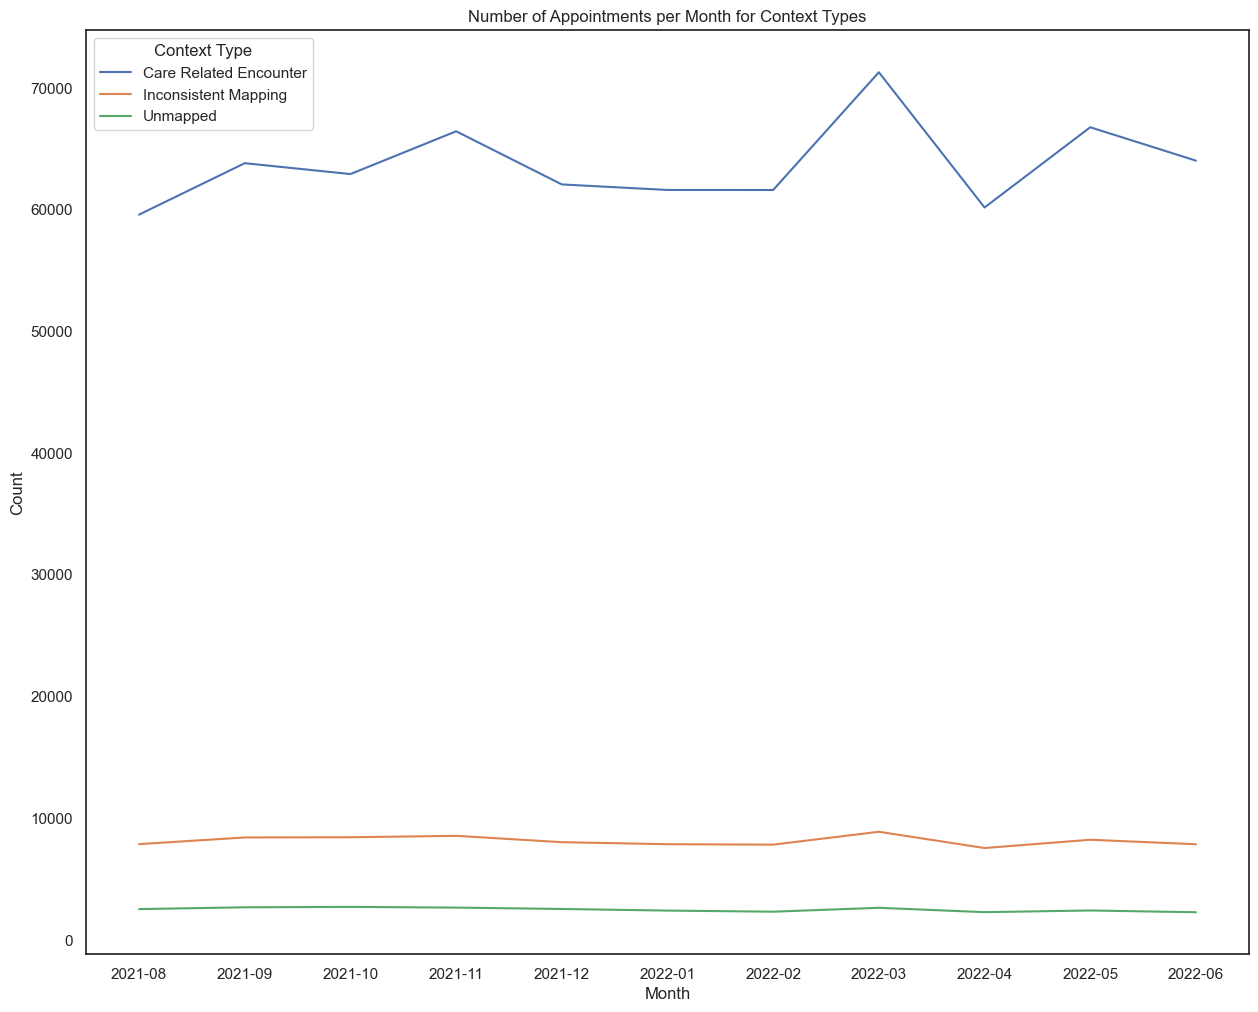

In [72]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count', hue='context_type', data=nc_ct)
# name graph
plt.title('Number of Appointments per Month for Context Types')
# name axis
plt.xlabel('Month')
plt.ylabel('Count')
# name legend
plt.legend(title='Context Type')
plt.show()

care related encounter = most common context type
flucctates with highest peak at beginning of covid and lowest during lockdown
inconsistent and unknown makes up large proportion of data which leads to gaps in the data and further questions posed 

**National categories:**

In [77]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(['appointment_month', 'national_category']).size().reset_index(name='count')

# View output.
nc_nc

,appointment_month,national_category,count
0,2021-08,Care Home Needs Assessment & Personalised Care...,2014
1,2021-08,Care Home Visit,2224
2,2021-08,Clinical Triage,6423
3,2021-08,General Consultation Acute,7423
4,2021-08,General Consultation Routine,7852
...,...,...,...
193,2022-06,Social Prescribing Service,2664
194,2022-06,Structured Medication Review,4168
195,2022-06,Unmapped,2269
196,2022-06,Unplanned Clinical Activity,3534


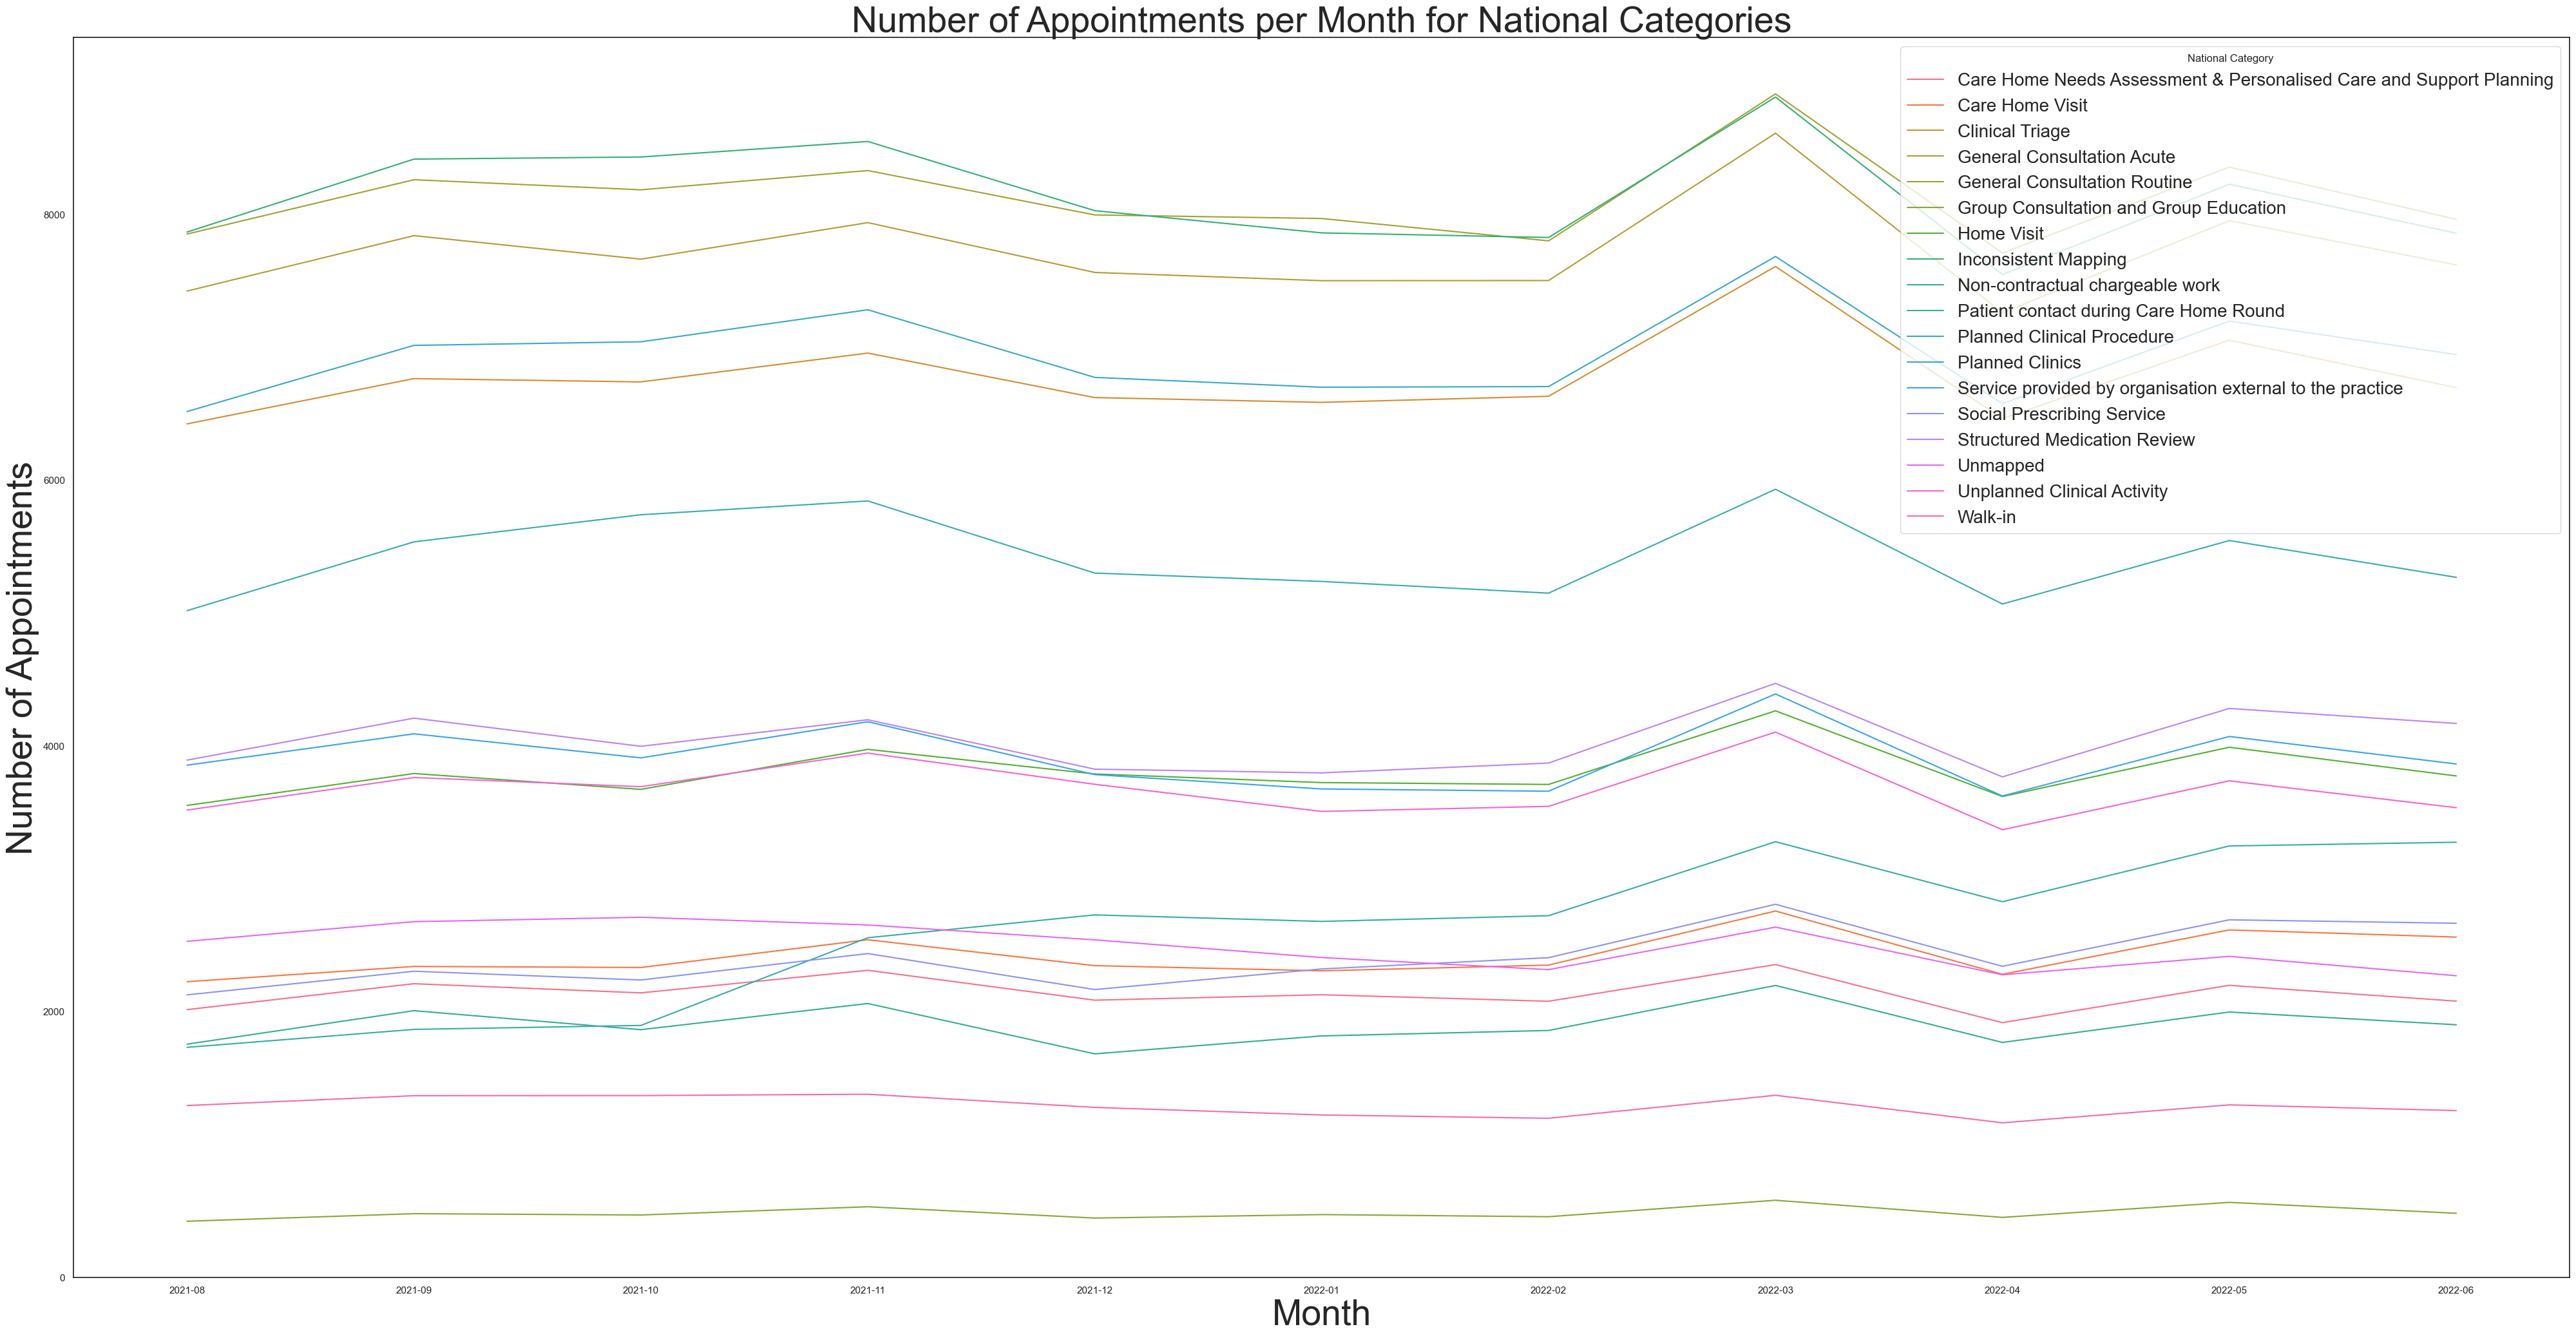

In [183]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
# figure size
plt.figure(figsize=(50, 25))
# allocate varibales to axis
sns.lineplot(x='appointment_month', y='count', hue='national_category', data=nc_nc)
# name graph and alter font size
plt.title('Number of Appointments per Month for National Categories', fontsize ="40")
# label axis and make modifications
plt.xlabel('Month', fontsize ="40")
plt.ylabel('Number of Appointments', fontsize ="40")
plt.legend(title='National Category', fontsize ="20", loc="upper right")
plt.show()

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [154]:
# Create a separate data set that can be used in future weeks. 
nc_summer = nc.groupby(['appointment_date', 'appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_summer

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
1665,2022-06-30,2022-06,Extended Access Provision,9163
1666,2022-06-30,2022-06,General Practice,1124374
1667,2022-06-30,2022-06,Other,23115
1668,2022-06-30,2022-06,Primary Care Network,34774


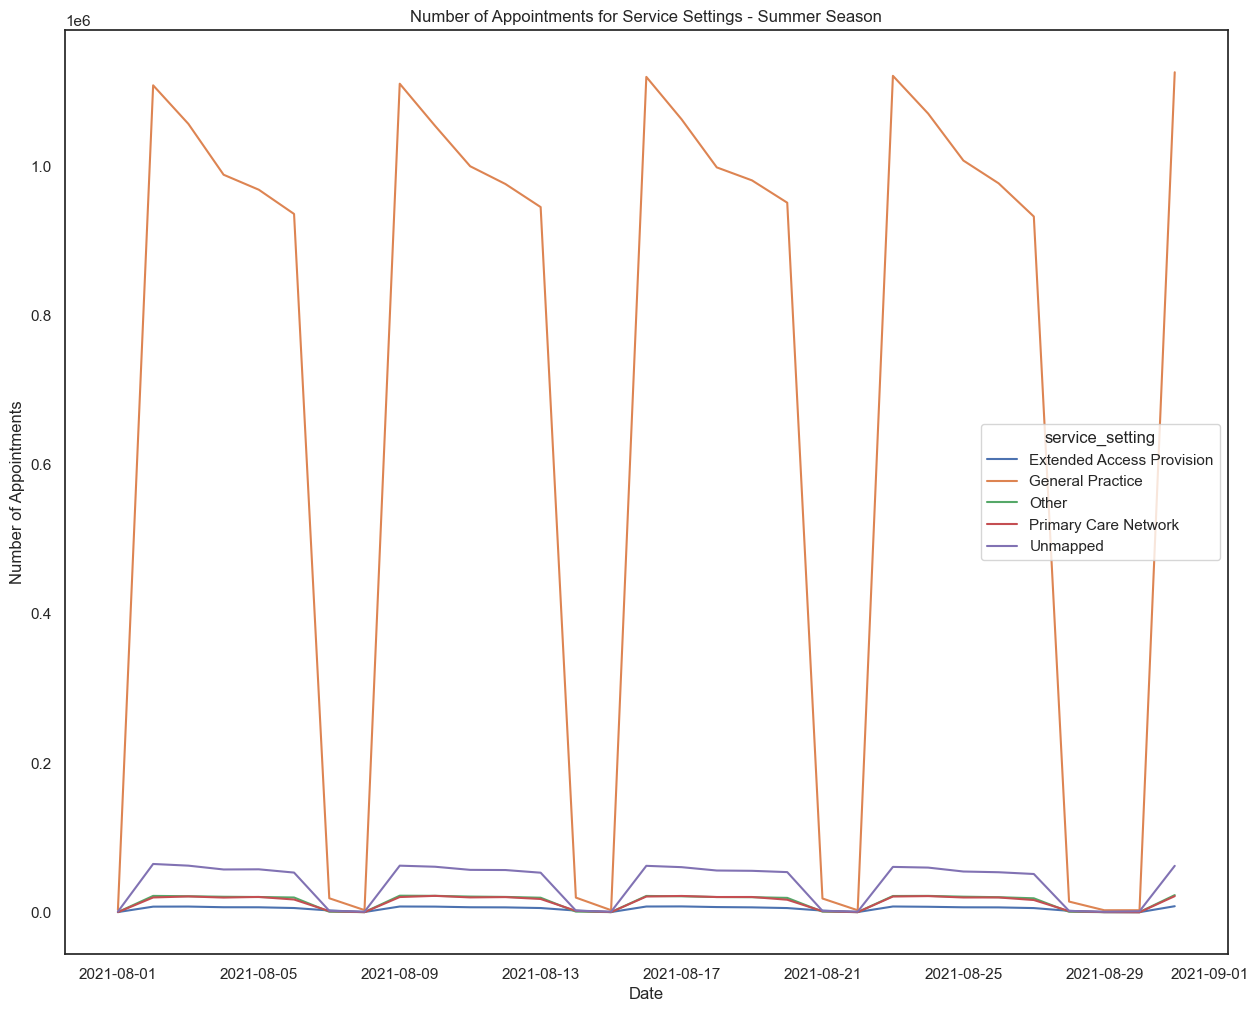

In [155]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
plt.figure(figsize=(15, 12))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
             data=nc_summer[nc_summer['appointment_month'] == '2021-08'], ci=None)
plt.title('Number of Appointments for Service Settings - Summer Season')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.show()

GP = highest service setting during the summer 
Secondary = unmapped 

**Autumn (October 2021):**

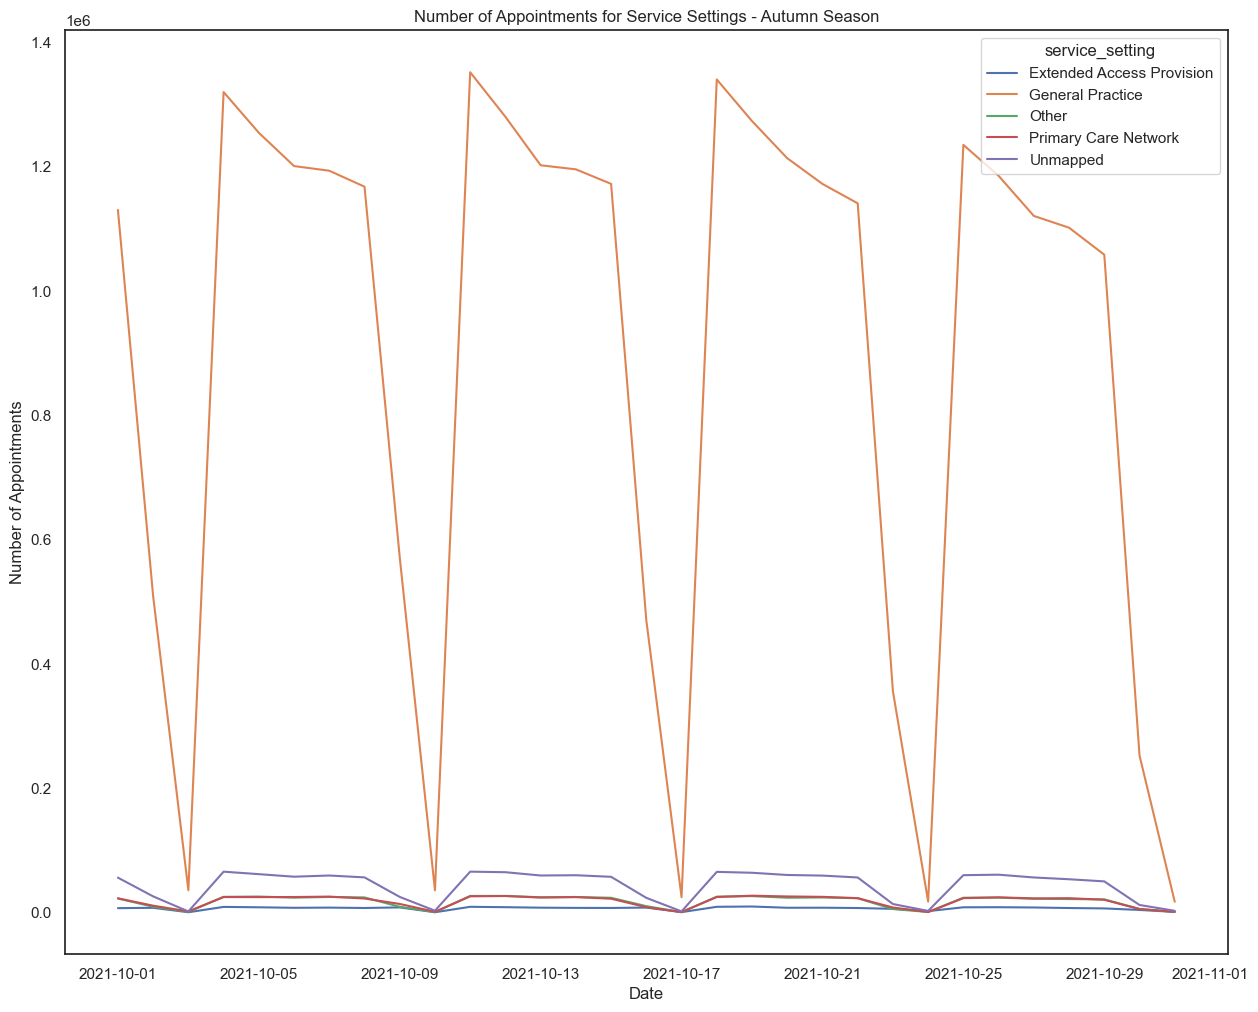

In [156]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
plt.figure(figsize=(15, 12))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
             data=nc_summer[nc_summer['appointment_month'] == '2021-10'], ci=None)
plt.title('Number of Appointments for Service Settings - Autumn Season')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.show()


GP = highest service setting during autumn 
Secondary = unmapped

**Winter (January 2022):**

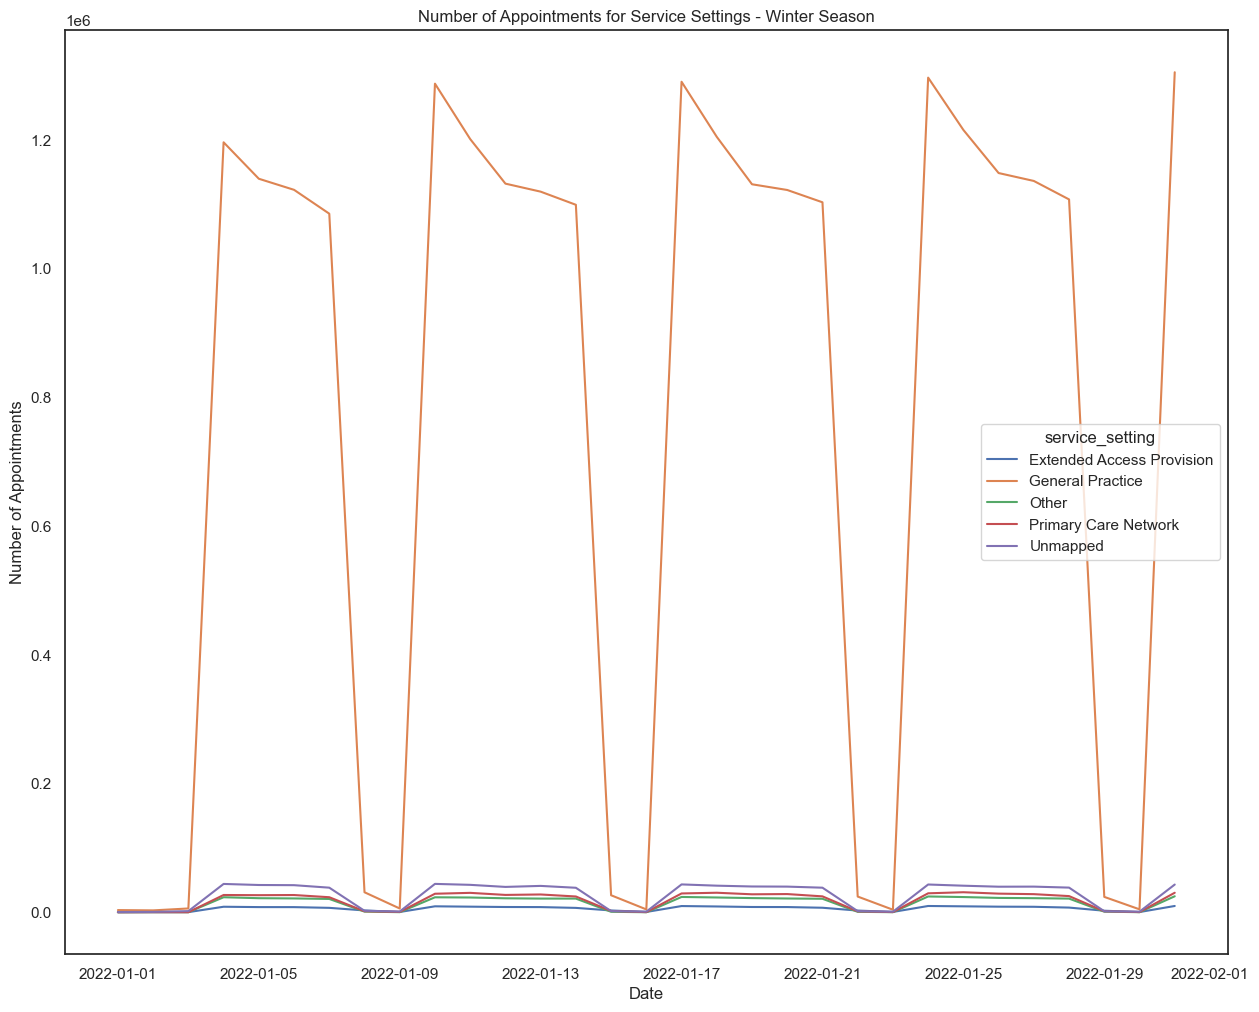

In [157]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
plt.figure(figsize=(15, 12))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
             data=nc_summer[nc_summer['appointment_month'] == '2022-01'], ci=None)
plt.title('Number of Appointments for Service Settings - Winter Season')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.show()

GP = highest service setting during the winter 
Secondary = unmapped

**Spring (April 2022):**

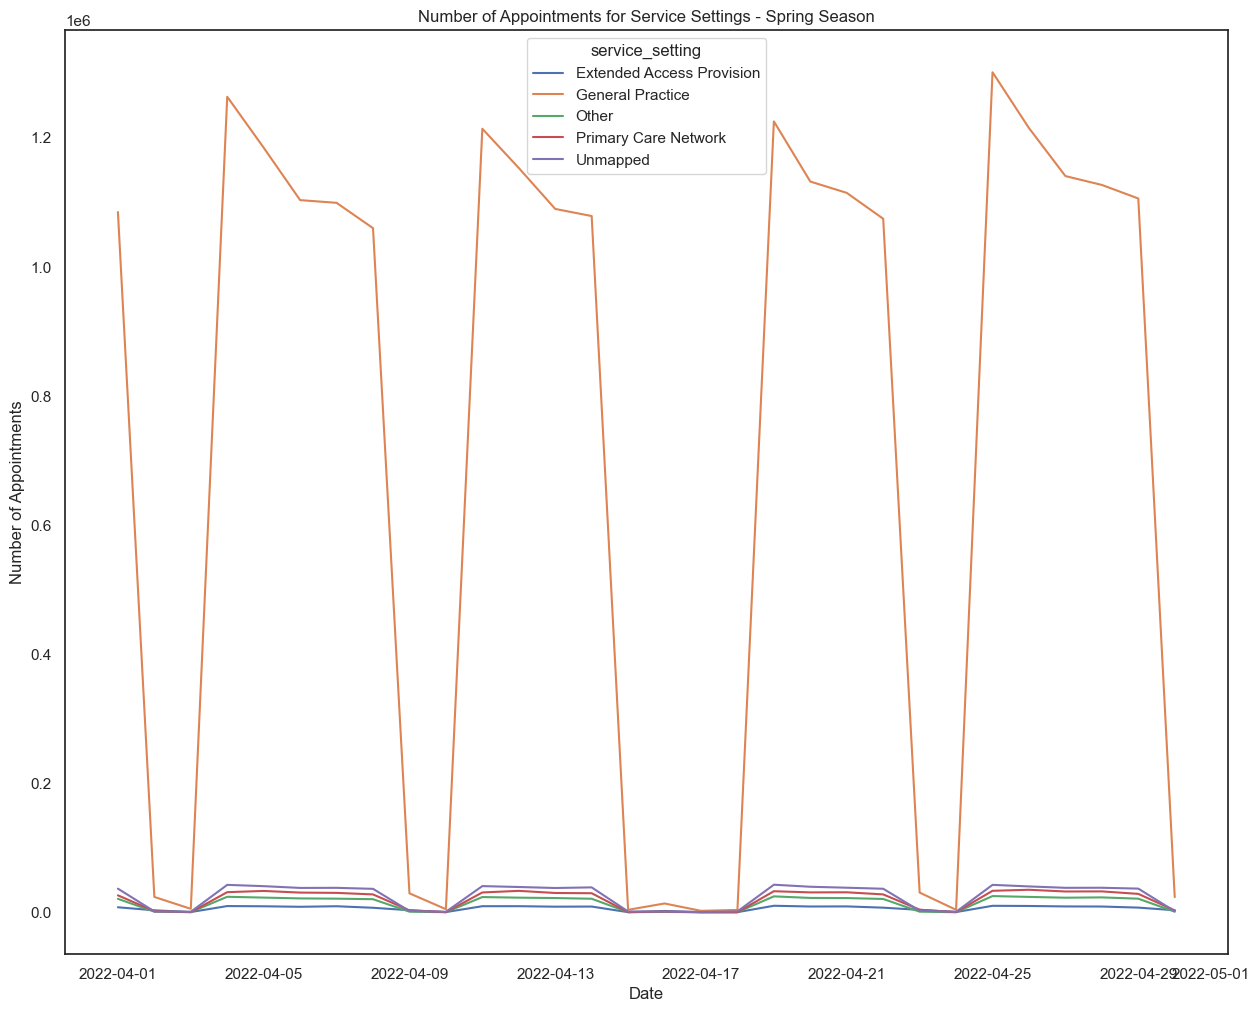

In [158]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
plt.figure(figsize=(15, 12))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
             data=nc_summer[nc_summer['appointment_month'] == '2022-04'], ci=None)
plt.title('Number of Appointments for Service Settings - Spring Season')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.show()

GP = highest service setting during the summer 
Secondary = unmapped

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [ ]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [84]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')


# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [79]:
# Explore the metadata.
print(tweets.dtypes)

tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


In [80]:
# Explore the data set.
tweets.describe()
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [90]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.
print(tweets['tweet_retweet_count'].value_counts())
print(tweets['tweet_favorite_count'].value_counts())

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64


Analysis of the value counts of the two columns allows an understanding to be made of the distribution between retweet and favourite counts in the dataset. Identifying popular tweets and more specifically hashtags can be used to measure engagement levels and in turn will create an idea as to what topics are most popular. 
"How to use Twitter for Business" by Driver (2022)
can idenitfy common themes or concerns expressed by users when looking at most popular hashtags and trending. 

In [91]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[["tweet_full_text"]].copy()
# View the DataFrame.
tweets_text



,tweet_full_text
0,As Arkansas’ first Comprehensive Stroke Certif...
1,RT @AndreaGrammer: Work-life balance is at the...
2,RT @OntarioGreens: $10 billion can go a long w...
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...
4,ICYMI: Our recent blogs on Cybersecurity in Ac...
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Repor...
1170,Not a cent towards workers who would like to a...
1171,"The @hfmaorg Region 9 presents ""The Value of E..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiothe...


In [95]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
# Convert the series to a DataFrame in preparation for visualisation.
tags = pd.Series(tags)
print(tags)

0              #healthcare
1           #premisehealth
2                  #hiring
3              #healthcare
4                  🚨#new:🚨
               ...        
4328    #mediqueststaffing
4329             #hospital
4330                #shift
4331       (#newportbeach)
4332                  #job
Length: 4333, dtype: object


In [96]:
# Display the first 30 records.
print(tags.head(30))

0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            #nursepractitioner
20                  

In [103]:
# Rename the columns.
data = tags.value_counts().reset_index()
data.columns = ['word', 'count']
data

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


healthcare is the most common hashtag

In [102]:
# Fix the count datatype.
data['count'] = data['count'].astype(int)

# View the result.
print(data.head())

          word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38


<Axes: xlabel='count', ylabel='word'>

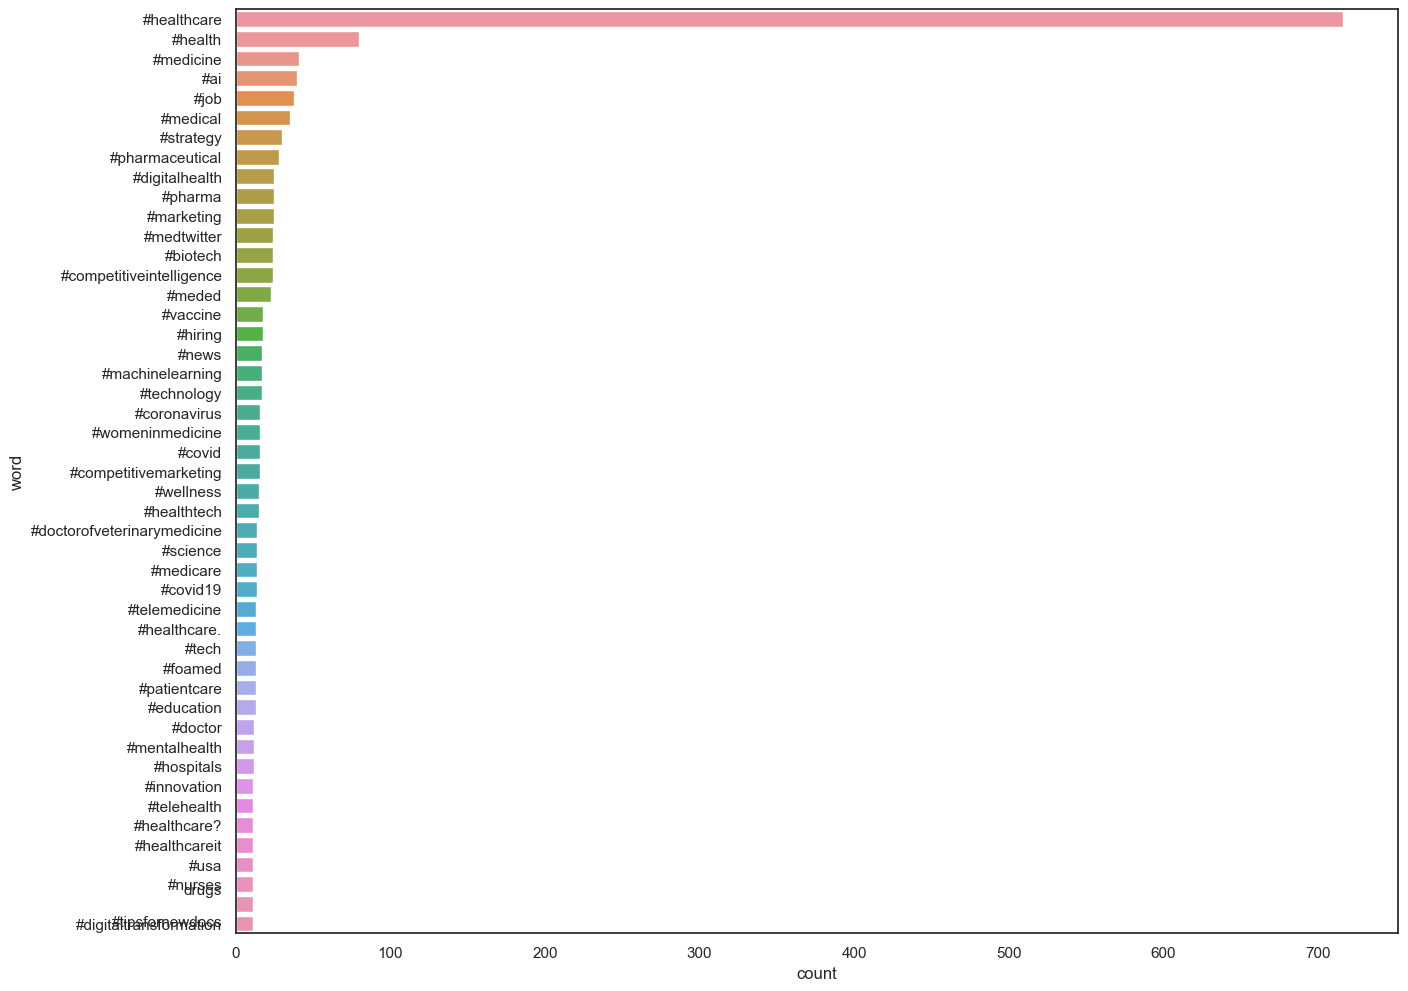

In [104]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(data=data[data['count'] > 10], x='count', y='word')

The bar plot displays the hashtags that have occurred more than 10 times. It is clear to see that healthcare is the most utilised hashtag with over 700 counts, which may be as a result of its generalised term. 

A closer analysis can be undertaken to exclude the overrepresented hashtags so that a deeper analysis can be made in to the hasthags that address specific hashtags.

<Axes: xlabel='count', ylabel='word'>

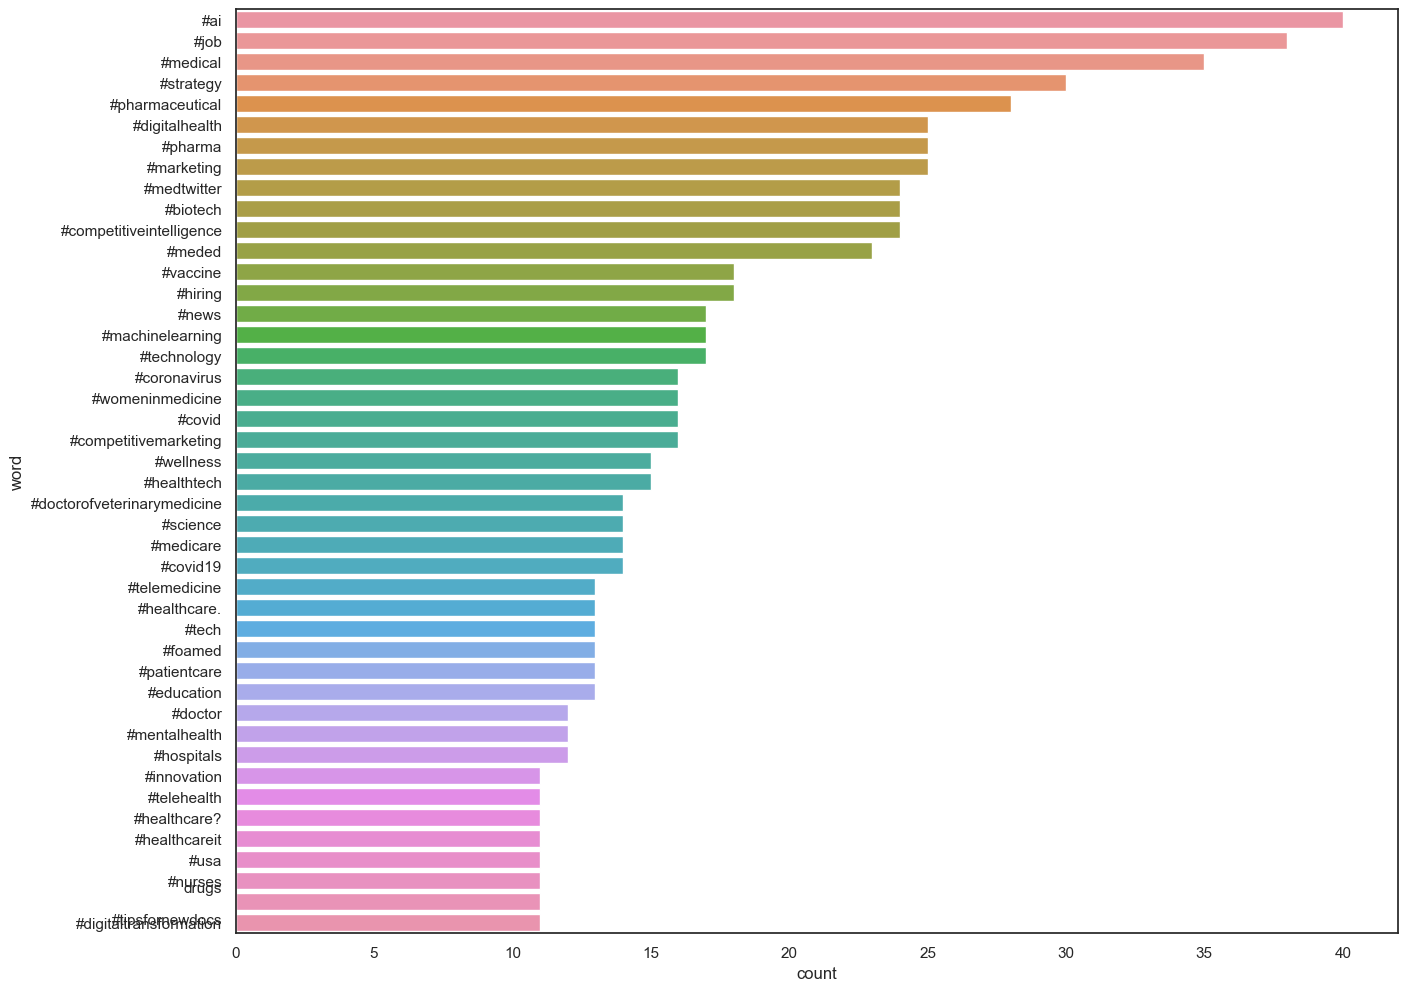

In [213]:
# Create the plot.
overrepresented = ['#healthcare', '#health', '#medicine']

# View the barplot.
sns.barplot(data=data[~data['word'].isin(overrepresented) & (data['count'] > 10)], x='count', y='word')


# 

# Assignment activity 6

### Investigate the main concerns posed by the NHS. 

In [106]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

In [105]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.
ar
print(ar.head(5))

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  


In [107]:
# Print the min and max dates.
print("appointments were made between:")
print (ar.appointment_month.min())
print (ar.appointment_month.max())

appointments were made between:
2020-01
2022-06


In [108]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_fltr = ar[ar['appointment_month'] >= '2021-08']
ar_fltr

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [109]:
# Create an aggregated data set to review the different features.
ar_agg = ar_fltr[['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments']].copy()


# View the DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,2021-08,GP,Attended,Face-to-Face,1 Day,6553
3653,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,2390
3654,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,10547
3655,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,937
3656,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...
596816,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [111]:

ar_agg = ar_agg.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment']).sum().reset_index()
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [112]:
# Determine the total number of appointments per month.
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.

ar_df = ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
ar_df['utilisation'] = ar_df['count_of_appointments'] / 30  # Assuming 30 days in a month
ar_df['utilisation'] = round(ar_df['utilisation'], 1)


# View the DataFrame.
ar_df

,appointment_month,count_of_appointments,utilisation
0,2021-08,23852171,795072.4
1,2021-09,28522501,950750.0
2,2021-10,30303834,1010127.8
3,2021-11,30405070,1013502.3
4,2021-12,25140776,838025.9
5,2022-01,25635474,854515.8
6,2022-02,25355260,845175.3
7,2022-03,29595038,986501.3
8,2022-04,23913060,797102.0
9,2022-05,27495508,916516.9


Utilisation did not reach 120,000,000 maximum. 

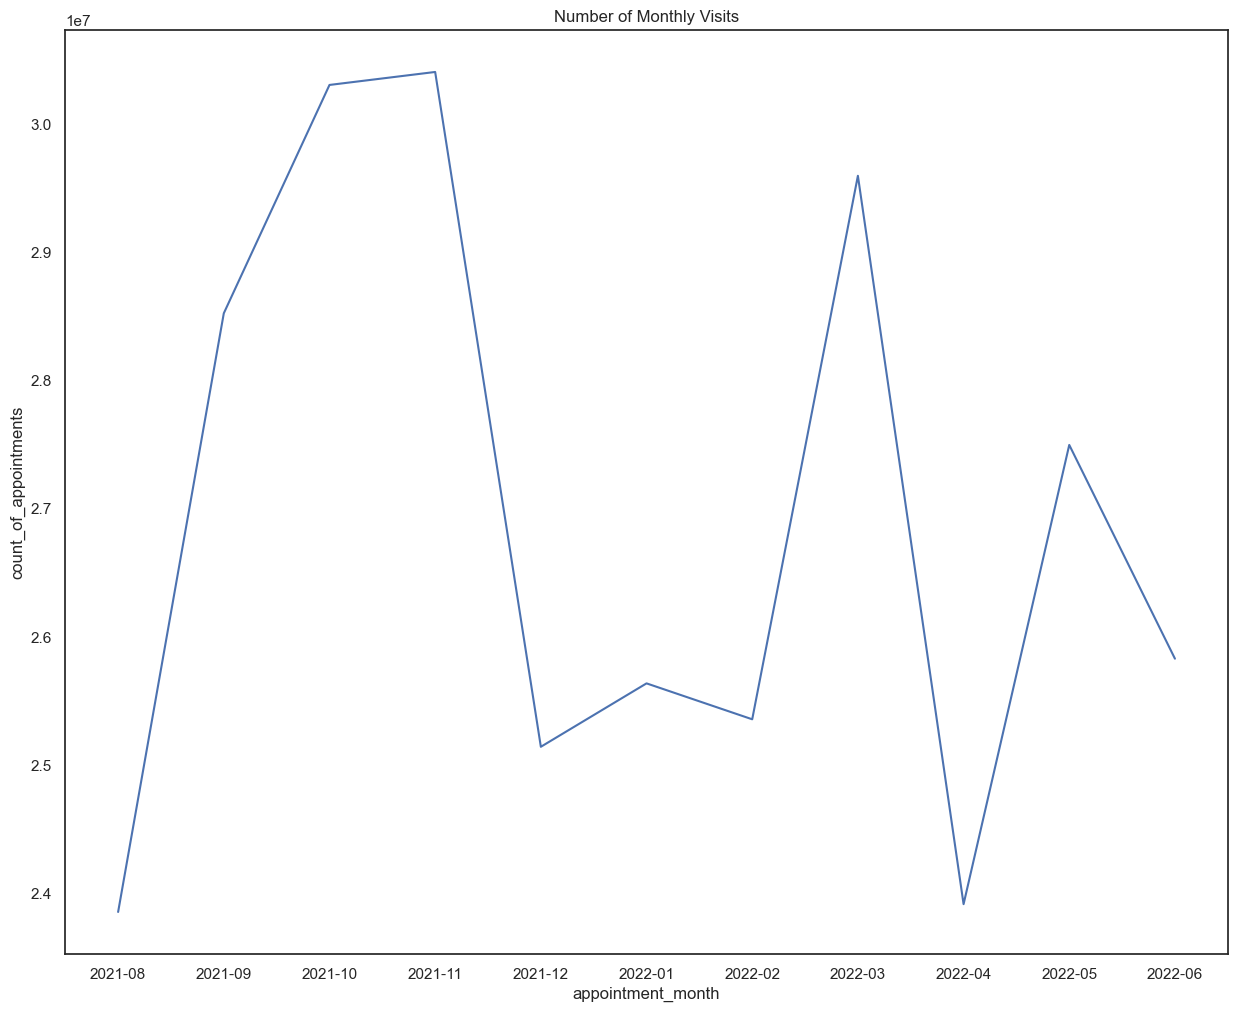

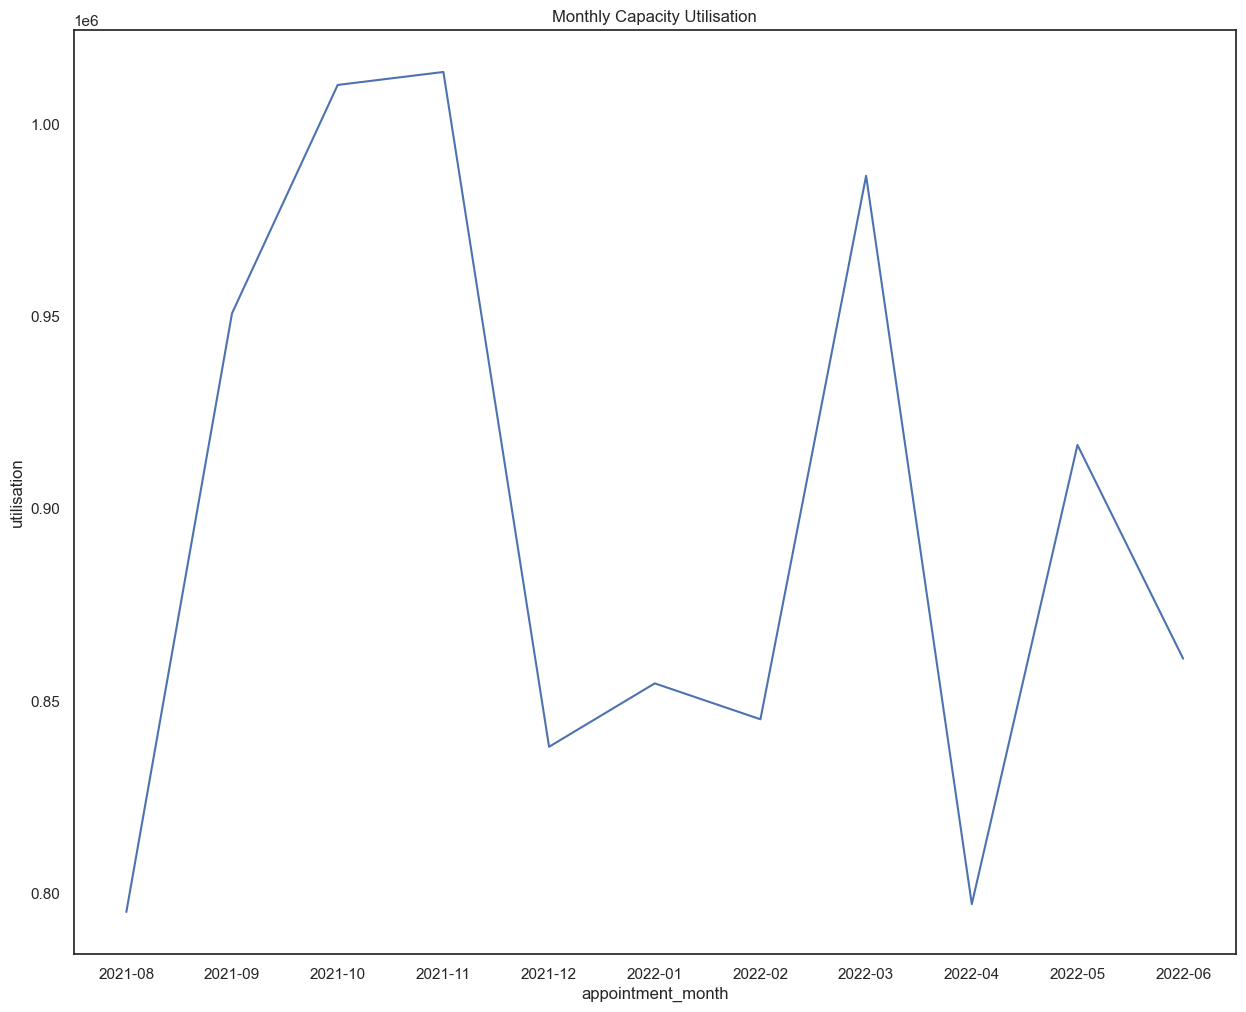

In [113]:
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)
ar_agg['appointment_month'] = ar_agg['appointment_month'].astype(str)
# Plot sum of count of monthly visits.
sns.lineplot(data=ar_df, x='appointment_month', y='count_of_appointments')
plt.title('Number of Monthly Visits')
plt.show()
# Plot monthly capacity utilisation.
sns.lineplot(data=ar_df, x='appointment_month', y='utilisation')
plt.title('Monthly Capacity Utilisation')
plt.show()



**Question 2:** How do the healthcare professional types differ over time?

In [114]:
# Convert appointment_month to datetime 
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])  
# Convert hcp_type to string 
ar['hcp_type'] = ar['hcp_type'].astype(str)  
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


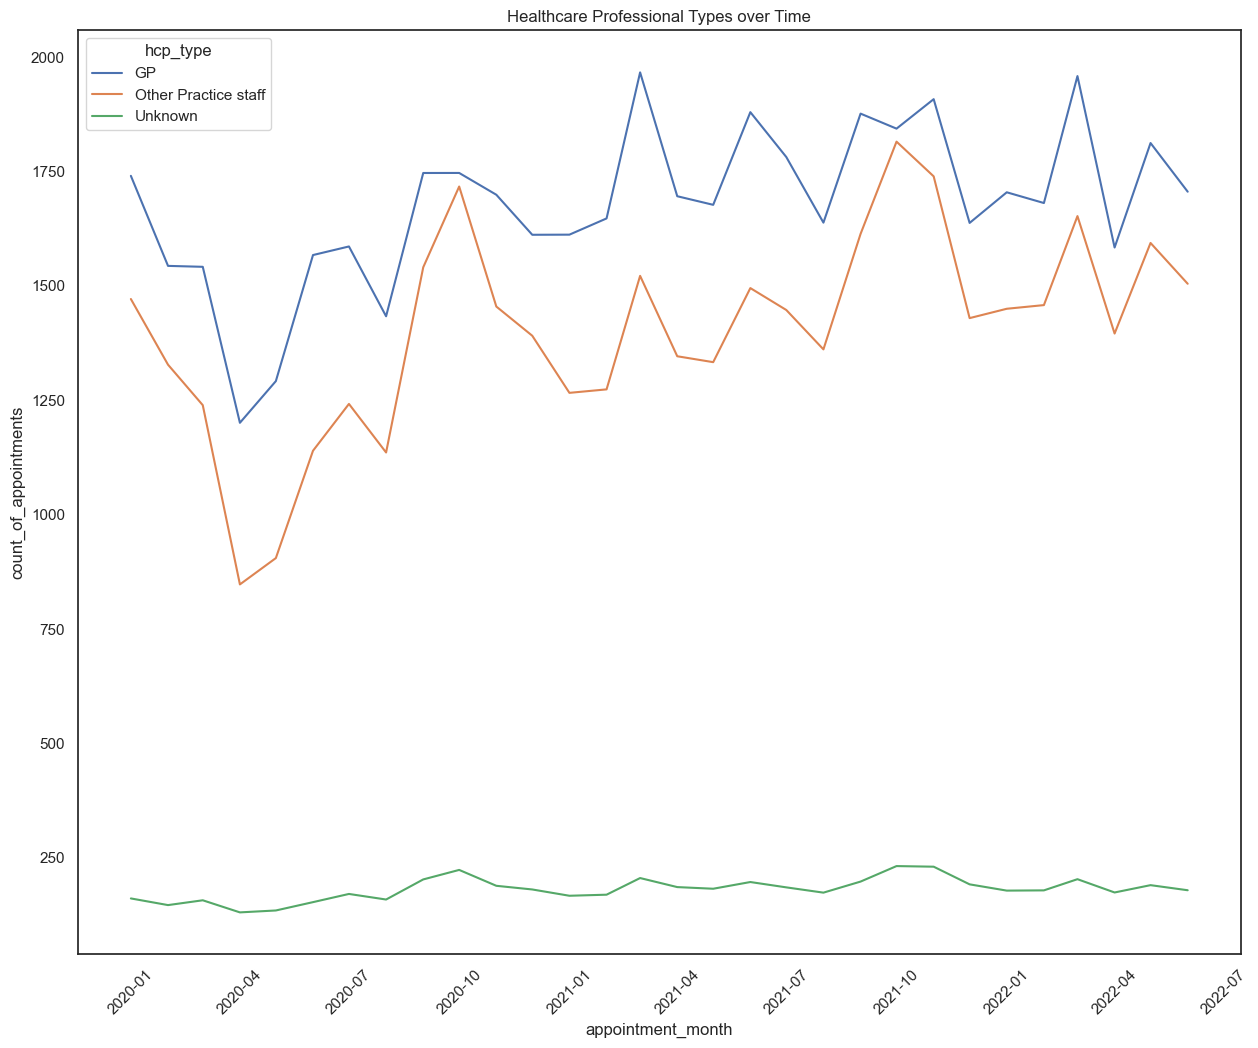

In [194]:
# Create a line plot to answer the question.
sns.lineplot(data=ar, x='appointment_month', y='count_of_appointments', hue='hcp_type', ci=None)
plt.title('Healthcare Professional Types over Time')
plt.xticks(rotation=45)
plt.show()


GP = most used healthcare proffessional type,they are the first point of call so alot of patients are filtered through this process
other HCP's = includes secondary part of care ie.referrals 

**Question 3:** Are there significant changes in whether or not visits are attended?

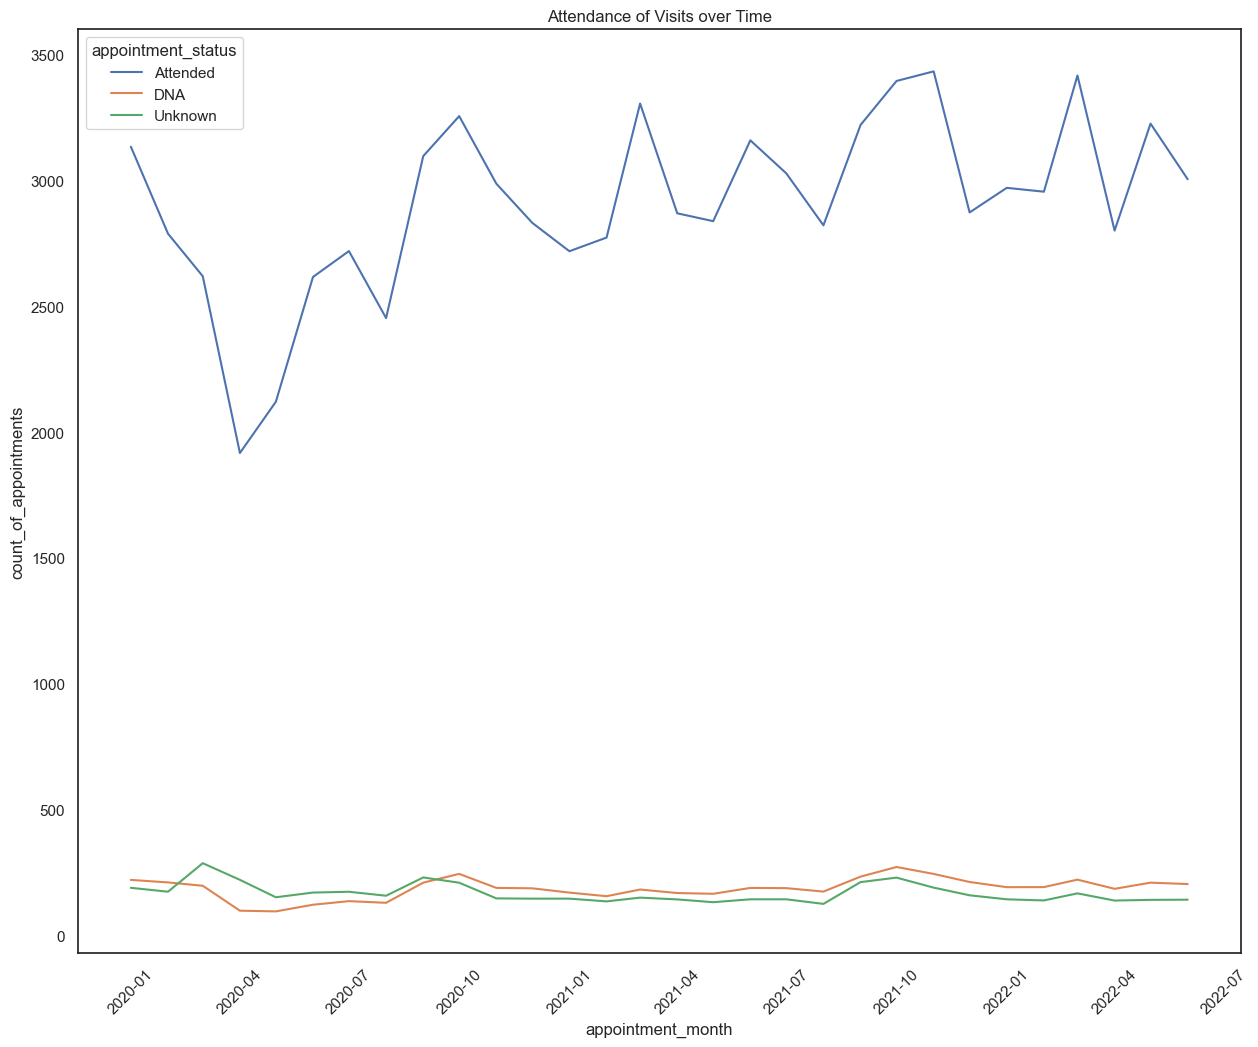

In [196]:
# Create a line plot to answer the question.
sns.lineplot(data=ar, x='appointment_month', y='count_of_appointments', hue= 'appointment_status', ci=None)
plt.title('Attendance of Visits over Time')
plt.xticks(rotation=45)
plt.show()


majority of apts made are attended 
still a huge question to be asked in unknonwn and dna as they follow the same pattern

**Question 4:** Are there changes in terms of appointment type and the busiest months?

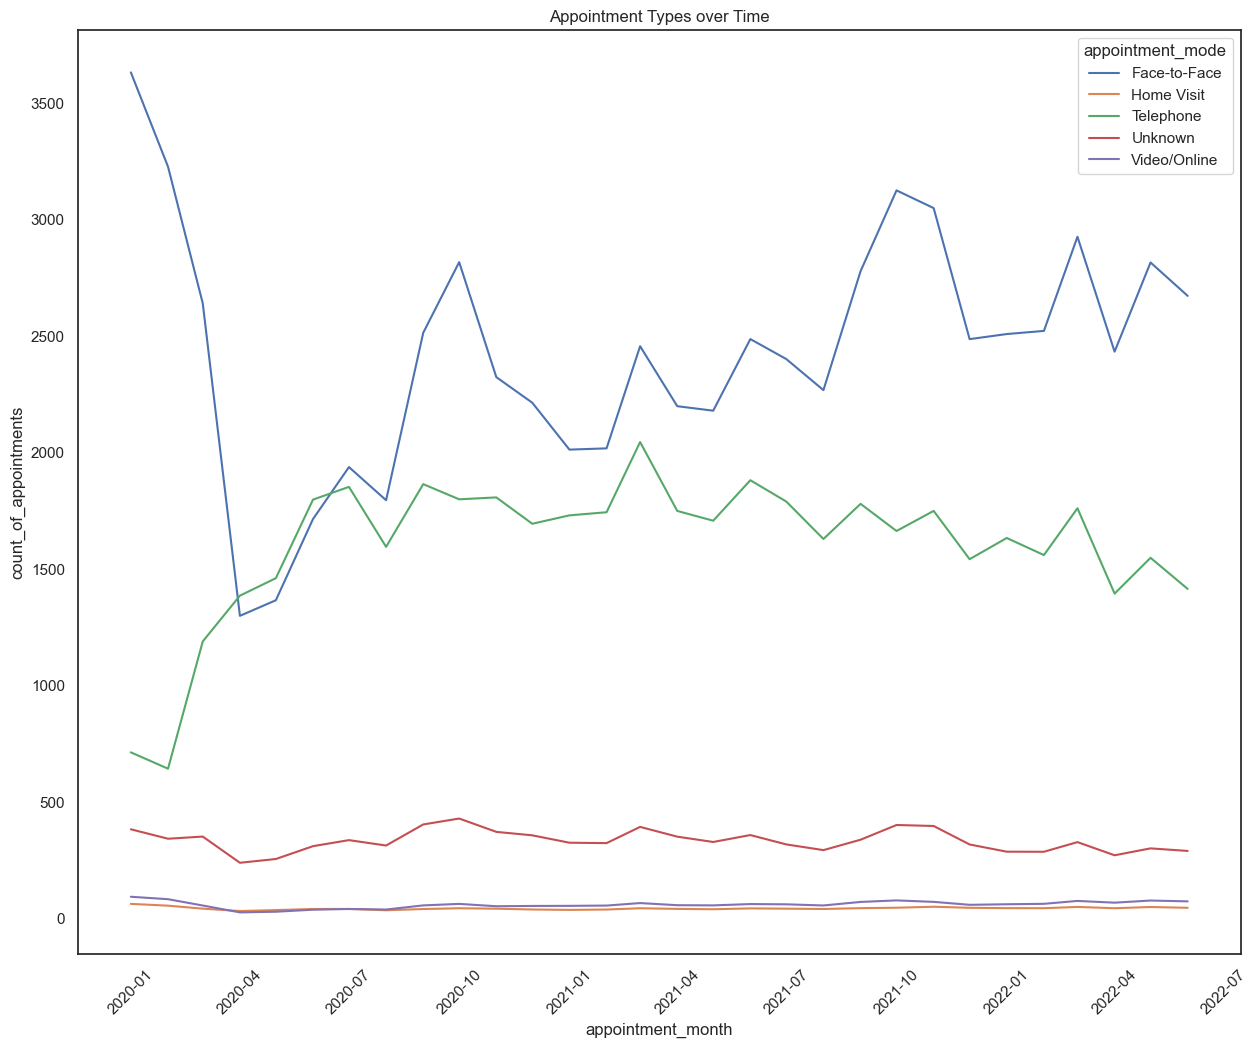

In [198]:
# Create a line plot to answer the question.
sns.lineplot(data=ar, x='appointment_month', y='count_of_appointments', hue='appointment_mode', ci=None)
plt.title('Appointment Types over Time')
plt.xticks(rotation=45)
plt.show()


face to face is most common.In march 2020 the face to face apts dropped due lockdown and telephone calls overtook face to face apts. 
telephone increased drasticall during first lockdown increased over time, now have slowly started to drop
face to face reamins to flucctuate .... maybe lockdowns and isolation periods?

**Question 5:** Are there any trends in time between booking an appointment?

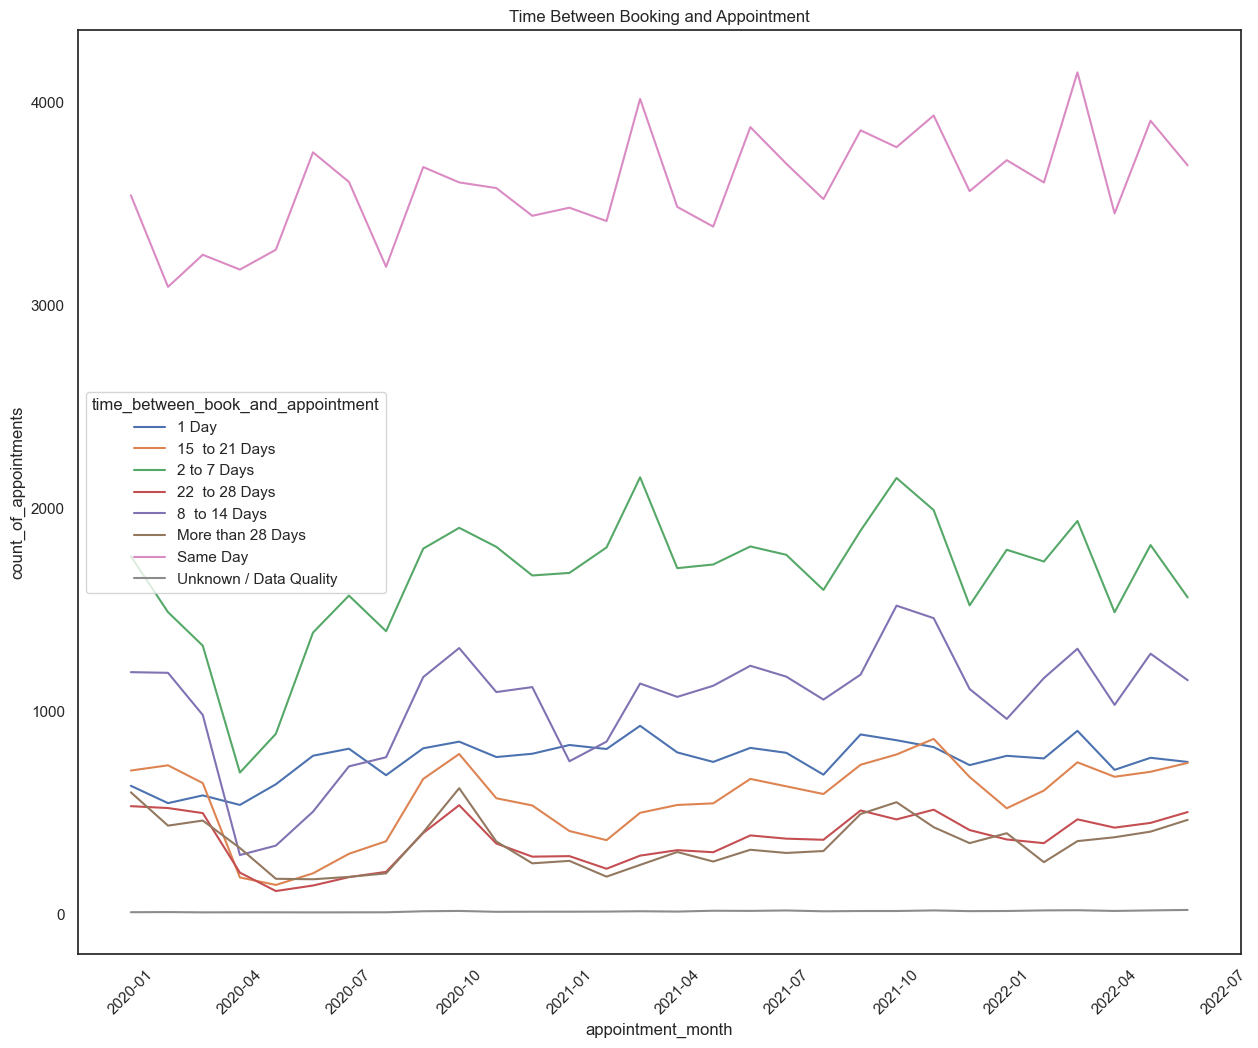

In [199]:
# Create a line plot to answer the question.
sns.lineplot(data=ar, x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', ci=None)
plt.title('Time Between Booking and Appointment')
plt.xticks(rotation=45)
plt.show()


same day apt = most common
2-14 days = second most common
1 day waiting time is the 4th most common

**Question 6:** How do the spread of service settings compare?

In [122]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [123]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
service_settings = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the DataFrame.
print(service_settings)

   appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision                 160927
1            2021-08           General Practice               21575852
2            2021-08                      Other                 449101
3            2021-08       Primary Care Network                 432448
4            2021-08                   Unmapped                1233843
5            2021-09  Extended Access Provision                 187906
6            2021-09           General Practice               25940821
7            2021-09                      Other                 527174
8            2021-09       Primary Care Network                 530485
9            2021-09                   Unmapped                1336115
10           2021-10  Extended Access Provision                 209539
11           2021-10           General Practice               27606171
12           2021-10                      Other                 556487
13    

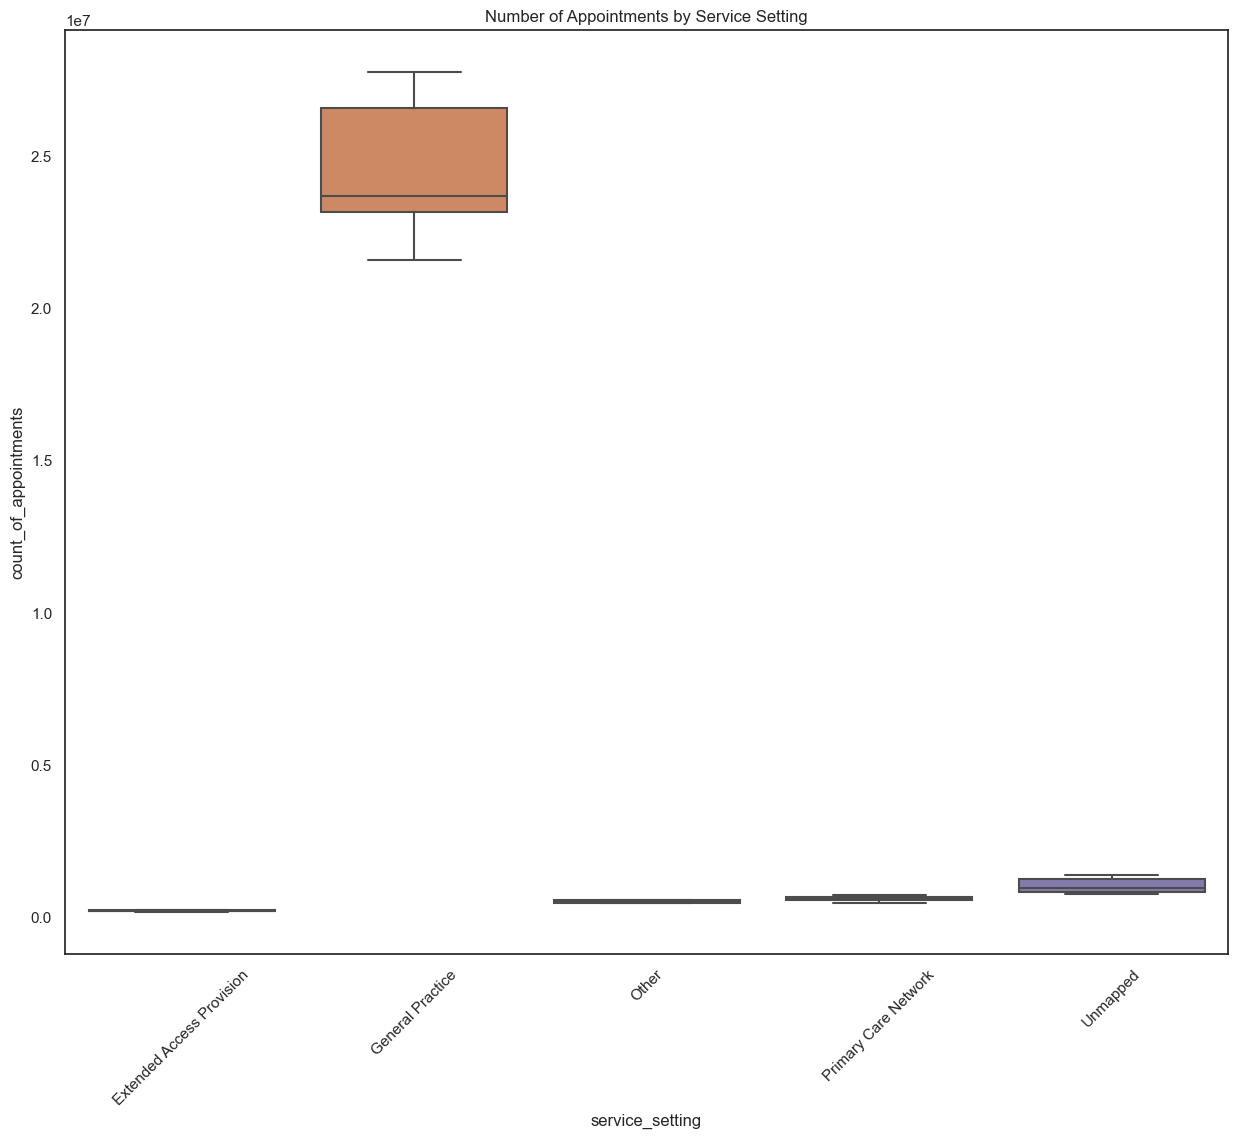

In [162]:
# Create a boxplot to investigate spread of service settings.
sns.boxplot(data=service_settings, x='service_setting', y='count_of_appointments')
plt.title('Number of Appointments by Service Setting')
plt.xticks(rotation=45)
plt.show()

GP = most accounted service setting

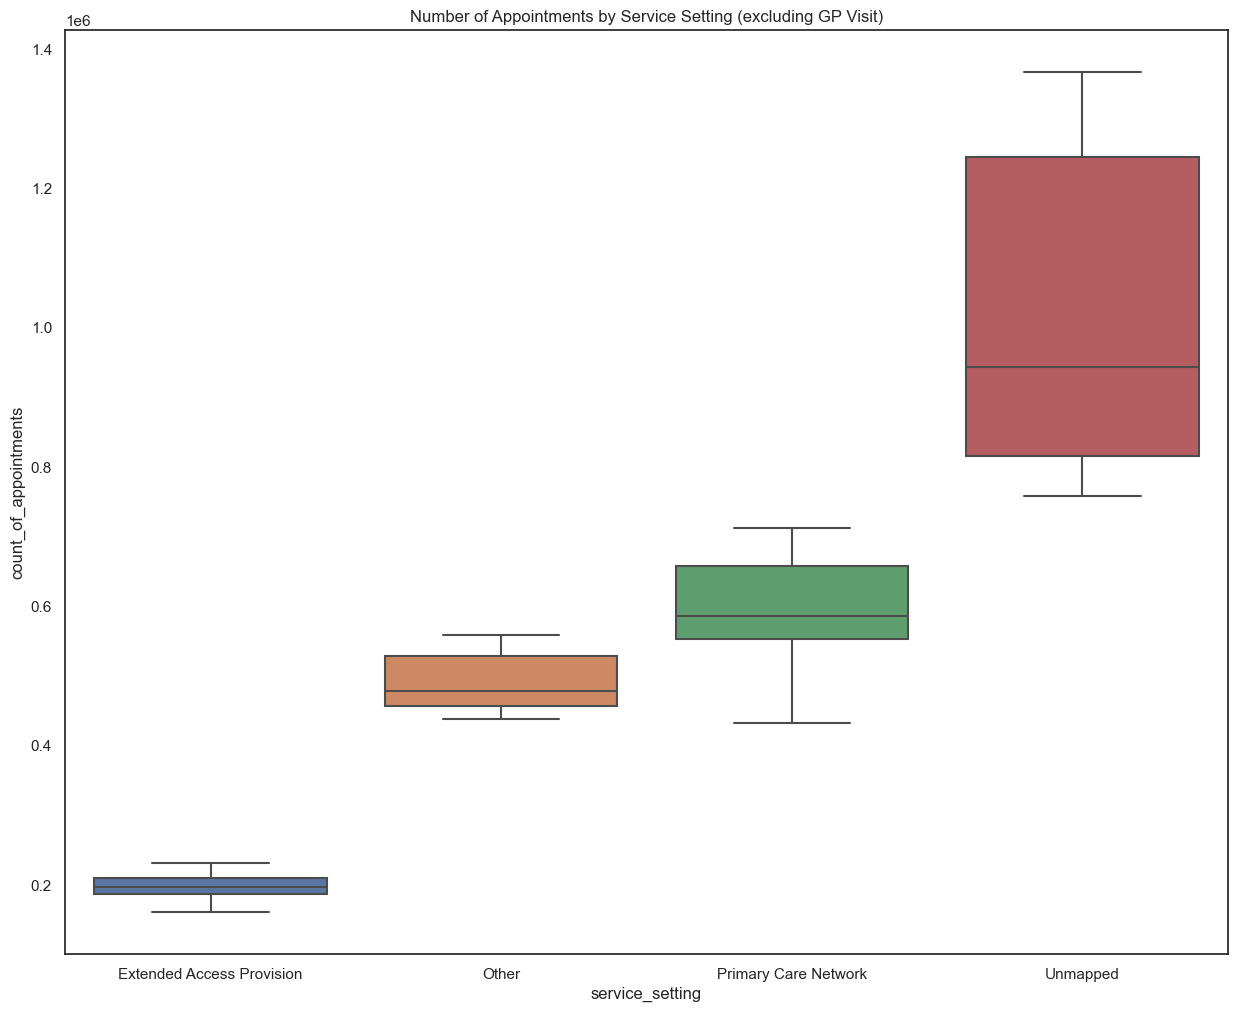

In [160]:
# Create a boxplot to investigate the service settings without GP.
service_settings_no_gp = service_settings[service_settings['service_setting'] != 'General Practice']
sns.boxplot(data=service_settings_no_gp, x='service_setting', y='count_of_appointments')
plt.title('Number of Appointments by Service Setting (excluding GP Visit)')
plt.show()

a large proportion of appointments are unmapped. These service settings need to be identfied.

# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.

summary and findings to  be found in technical report 